In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import folium
from sqlalchemy import create_engine
from shapely.geometry import shape
from io import BytesIO
import base64

from dotenv import load_dotenv
import os
import json

# .env 파일을 찾아 환경 변수로 로드
load_dotenv()

# 환경 변수 가져오기
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ▶️ MySQL 연결
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


In [2]:
query1 = """
DESCRIBE seoul_abandoned_animal_status
"""
query2 = """
SHOW tables
"""
# pd.read_sql(query1, engine)
pd.read_sql(query2, engine)

,Tables_in_eda
0,animal_beauty_business
1,animal_hospital_registry
2,animal_pharmacy_registry
3,companion_animal_registration
4,korea_urban_park_info
5,per_capita_park_area
6,pollution_co_concentration_by_station
7,pollution_emission_facility
8,seoul_abandoned_animal_status
9,seoul_abandonment_statistics


In [3]:
# ▶️ seoul_abandoned_animal_status 등록 데이터 가져오기
query = """
SELECT *
FROM seoul_abandoned_animal_status
"""
df = pd.read_sql(query, engine)
df

,id,district_level_1,district_level_2,total_count,dog_total,dog_returned,dog_adopted,dog_deceased,dog_other,cat_total,cat_returned,cat_adopted,cat_deceased,cat_other,etc_total,etc_returned,etc_adopted,etc_deceased,etc_other,created_at
0,1,합계,소계,5176,2428,1134,702,565,27,2307,84,729,1431,63,441,22,226,185,8,2025-07-03 11:34:27
1,2,합계,종로구,161,67,29,9,29,0,86,2,13,69,2,8,1,3,4,0,2025-07-03 11:34:27
2,3,합계,중구,100,33,21,7,5,0,51,1,14,35,1,16,1,5,10,0,2025-07-03 11:34:27
3,4,합계,용산구,237,116,81,32,3,0,109,21,24,61,3,12,4,2,2,4,2025-07-03 11:34:27
4,5,합계,성동구,175,53,22,23,8,0,107,0,49,58,0,15,0,7,8,0,2025-07-03 11:34:27
5,6,합계,광진구,177,79,34,33,12,0,84,2,25,57,0,14,2,6,6,0,2025-07-03 11:34:27
6,7,합계,동대문구,217,76,30,31,13,2,120,11,51,53,5,21,0,14,3,4,2025-07-03 11:34:27
7,8,합계,중랑구,222,104,47,42,12,3,105,0,22,80,3,13,2,5,6,0,2025-07-03 11:34:27
8,9,합계,성북구,193,88,49,17,21,1,84,2,13,69,0,21,1,14,6,0,2025-07-03 11:34:27
9,10,합계,강북구,238,140,56,36,48,0,81,2,26,52,1,17,2,7,8,0,2025-07-03 11:34:27


In [ ]:

# ▶️ 서울 반려동물 유기/안락사 현황 정보 가져오기
  # 영업/정상 : 필터링
  # 서울특별시 : 지역으로 필터링
  
query = """
SELECT *
FROM seoul_abandoned_animal_status
"""
df = pd.read_sql(query, engine)
df

,id,district_level_1,district_level_2,total_count,dog_total,dog_returned,dog_adopted,dog_deceased,dog_other,cat_total,cat_returned,cat_adopted,cat_deceased,cat_other,etc_total,etc_returned,etc_adopted,etc_deceased,etc_other,created_at
0,1,합계,소계,5176,2428,1134,702,565,27,2307,84,729,1431,63,441,22,226,185,8,2025-07-03 11:34:27
1,2,합계,종로구,161,67,29,9,29,0,86,2,13,69,2,8,1,3,4,0,2025-07-03 11:34:27
2,3,합계,중구,100,33,21,7,5,0,51,1,14,35,1,16,1,5,10,0,2025-07-03 11:34:27
3,4,합계,용산구,237,116,81,32,3,0,109,21,24,61,3,12,4,2,2,4,2025-07-03 11:34:27
4,5,합계,성동구,175,53,22,23,8,0,107,0,49,58,0,15,0,7,8,0,2025-07-03 11:34:27
5,6,합계,광진구,177,79,34,33,12,0,84,2,25,57,0,14,2,6,6,0,2025-07-03 11:34:27
6,7,합계,동대문구,217,76,30,31,13,2,120,11,51,53,5,21,0,14,3,4,2025-07-03 11:34:27
7,8,합계,중랑구,222,104,47,42,12,3,105,0,22,80,3,13,2,5,6,0,2025-07-03 11:34:27
8,9,합계,성북구,193,88,49,17,21,1,84,2,13,69,0,21,1,14,6,0,2025-07-03 11:34:27
9,10,합계,강북구,238,140,56,36,48,0,81,2,26,52,1,17,2,7,8,0,2025-07-03 11:34:27


In [20]:
# 개 / 고양이 유기동물 발생 합계 계산
# 개 / 고양이 안락사 발생 합계 계산

# 0번행(총계) 제거
df.drop(0, inplace=True)

# 구별 개수 집계
df['abandon_count'] = df['dog_total'] + df['cat_total']
df['deceased_count'] = df['dog_deceased'] + df['cat_deceased']

# 2. 구별 유기동물/안락사 합계 집계
abandon_counts = df.groupby('district_level_2')['abandon_count'].sum().reset_index()
abandon_counts = abandon_counts.sort_values('abandon_count', ascending=False)

deceased_counts = df.groupby('district_level_2')['deceased_count'].sum().reset_index()
deceased_counts = deceased_counts.sort_values('deceased_count', ascending=False)

# 3. 결과 출력
print(df['abandon_count'])
# print(abandon_counts)
# print(deceased_counts)

1     153
2      84
3     225
4     160
5     163
6     196
7     209
8     172
9     221
10    178
11    182
12    227
13    141
14    323
15    209
16    222
17    178
18    153
19    141
20    177
21    261
22    166
23    141
24    195
25    258
Name: abandon_count, dtype: int64


/home/park/eda-repo-3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


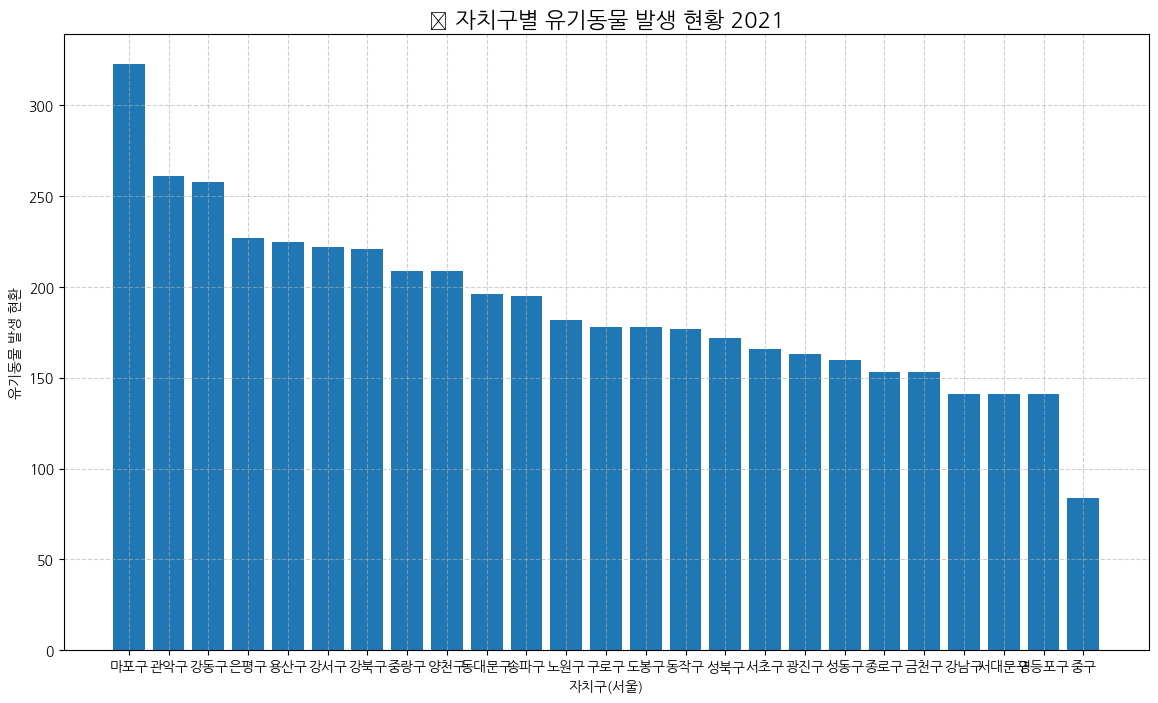

In [21]:
# ▶️ 시각화 (자치구별 유기동물 발생 추이)
plt.figure(figsize=(14, 8))
plt.bar(abandon_counts['district_level_2'], abandon_counts['abandon_count'])
plt.title("✅ 자치구별 유기동물 발생 현황 2021", fontsize=16)
plt.xlabel("자치구(서울)")
plt.ylabel("유기동물 발생 현황")
plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
plt.show()

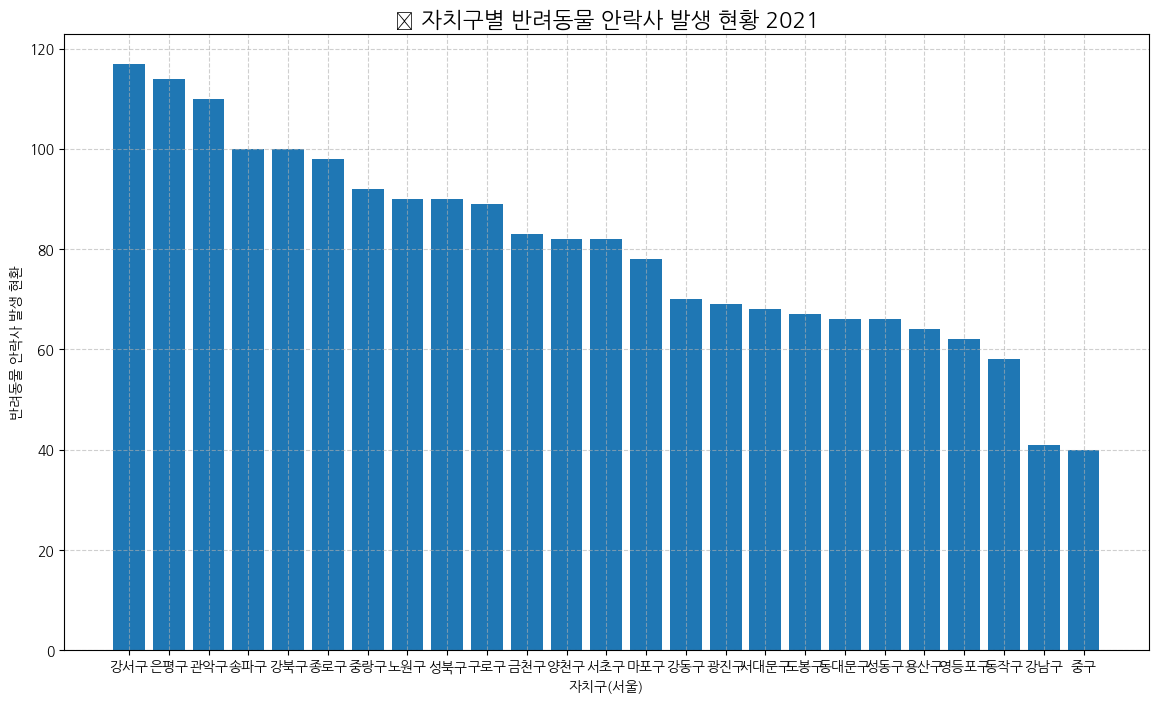

In [22]:
# ▶️ 시각화 (자치구별 반려동물 안락사 발생 추이)
plt.figure(figsize=(14, 8))
plt.bar(deceased_counts['district_level_2'], deceased_counts['deceased_count'])
plt.title("✅ 자치구별 반려동물 안락사 발생 현황 2021", fontsize=16)
plt.xlabel("자치구(서울)")
plt.ylabel("반려동물 안락사 발생 현황")
plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
plt.show()